In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# test this works on your machine
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.inspection import permutation_importance
# to fix vscode issues with matplotlib
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'white'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

# change the path to read in the data
df = pd.read_csv('../output/state_poverty_and_income.csv')

Remove rotary cylinder type (only string value) convert column to float
- Removed from the beginning to keep shape

In [3]:
df.columns


Index(['Unnamed: 0', 'AREA', 'STATE', 'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP',
       'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN',
       'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
       'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'YEAR',
       'SAEMHI_MOE', 'SAEMHI_PT', 'SAEMHI_UB90', 'SAEPOV0_17_LB90',
       'SAEPOV0_17_MOE', 'SAEPOV0_17_PT', 'SAEPOV0_17_UB90', 'SAEPOV0_4_LB90',
       'SAEPOV0_4_MOE', 'SAEPOV0_4_PT', 'SAEPOV0_4_UB90', 'SAEPOV5_17R_LB90',
       'SAEPOV5_17R_MOE', 'SAEPOV5_17R_PT', 'SAEPOV5_17R_UB90',
       'SAEPOVALL_LB90', 'SAEPOVALL_MOE', 'SAEPOVALL_PT', 'SAEPOVALL_UB90',
       'SAEPOVRT0_17_LB90', 'SAEPOVRT0_17_MOE', 'SAEPOVRT0_17_PT',
       'SAEPOVRT0_17_UB90', 'SAEPOVRT0_4_LB90', 'SAEPOVRT0_4_MOE',
       'SAEPOVRT0_4_PT', 'SAEPOVRT0_4_UB90', 'SAEPOVRT5_17R_LB90',
       'SAEPOVRT5_17R_MOE', 'SAEPOVRT5_17R_PT', 'SAEPOVRT5_17R_UB90',
       'SAEPOVRTALL_LB90', 'SAEPOVRTALL_MOE', 'SAEPOVRTALL_PT'

In [4]:
y = df['SAEPOVRTALL_PT']

 #df_train = df[['MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
#        'Cylinders', 'EngineSize', 'Horsepower', 'RPM','Rev.per.mile',
#        'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
#        'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
#        'Weight', 'Origin']]

df_train =df[['AREA', 'STATE', 'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP',
       'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN',
       'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
       'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'YEAR',
       'SAEMHI_MOE', 'SAEMHI_PT', 'SAEMHI_UB90', 'SAEPOV0_17_LB90',
       'SAEPOV0_17_MOE', 'SAEPOV0_17_PT', 'SAEPOV0_17_UB90', 'SAEPOV0_4_LB90',
       'SAEPOV0_4_MOE', 'SAEPOV0_4_PT', 'SAEPOV0_4_UB90', 'SAEPOV5_17R_LB90',
       'SAEPOV5_17R_MOE', 'SAEPOV5_17R_PT', 'SAEPOV5_17R_UB90',
       'SAEPOVALL_LB90', 'SAEPOVALL_MOE', 'SAEPOVALL_PT', 'SAEPOVALL_UB90',
       'SAEPOVRT0_17_LB90', 'SAEPOVRT0_17_MOE', 'SAEPOVRT0_17_PT',
       'SAEPOVRT0_17_UB90', 'SAEPOVRT0_4_LB90', 'SAEPOVRT0_4_MOE',
       'SAEPOVRT0_4_PT', 'SAEPOVRT0_4_UB90', 'SAEPOVRT5_17R_LB90',
       'SAEPOVRT5_17R_MOE', 'SAEPOVRT5_17R_PT', 'SAEPOVRT5_17R_UB90',
       'SAEPOVRTALL_LB90', 'SAEPOVRTALL_MOE', 
       'SAEPOVRTALL_UB90', 'SAEPOVU_0_17', 'SAEPOVU_0_4', 'SAEPOVU_5_17R',
       'SAEPOVU_ALL']]

In [5]:
df_train.head()


,AREA,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,YEAR,SAEMHI_MOE,SAEMHI_PT,SAEMHI_UB90,SAEPOV0_17_LB90,SAEPOV0_17_MOE,SAEPOV0_17_PT,SAEPOV0_17_UB90,SAEPOV0_4_LB90,SAEPOV0_4_MOE,SAEPOV0_4_PT,SAEPOV0_4_UB90,SAEPOV5_17R_LB90,SAEPOV5_17R_MOE,SAEPOV5_17R_PT,SAEPOV5_17R_UB90,SAEPOVALL_LB90,SAEPOVALL_MOE,SAEPOVALL_PT,SAEPOVALL_UB90,SAEPOVRT0_17_LB90,SAEPOVRT0_17_MOE,SAEPOVRT0_17_PT,SAEPOVRT0_17_UB90,SAEPOVRT0_4_LB90,SAEPOVRT0_4_MOE,SAEPOVRT0_4_PT,SAEPOVRT0_4_UB90,SAEPOVRT5_17R_LB90,SAEPOVRT5_17R_MOE,SAEPOVRT5_17R_PT,SAEPOVRT5_17R_UB90,SAEPOVRTALL_LB90,SAEPOVRTALL_MOE,SAEPOVRTALL_UB90,SAEPOVU_0_17,SAEPOVU_0_4,SAEPOVU_5_17R,SAEPOVU_ALL
0,1,Alabama,00-0000,All Occupations,total,1922570,0.4,1000.000,1.00,20.76,43170.0,0.5,8.54,10.45,15.77,25.01,37.83,17770.0,21740.0,32800.0,52020.0,78690.0,2017,742.0,48193.0,48935.0,253694.0,9215.0,262909.0,272124.0,75009.0,3977.0,78986.0,82963.0,172412.0,8182.0,180594.0,188776.0,784517.0,17746.0,802263.0,820009.0,23.5,0.9,24.4,25.3,26.3,1.4,27.7,29.1,21.8,1.0,22.8,23.8,16.5,0.4,17.3,1079561.0,285282.0,790771.0,4752519.0
1,1,Alabama,11-0000,Management Occupations,major,69950,1.0,36.385,0.71,53.44,111150.0,0.6,25.06,33.71,46.63,64.12,90.80,52130.0,70130.0,96980.0,133360.0,188860.0,2017,742.0,48193.0,48935.0,253694.0,9215.0,262909.0,272124.0,75009.0,3977.0,78986.0,82963.0,172412.0,8182.0,180594.0,188776.0,784517.0,17746.0,802263.0,820009.0,23.5,0.9,24.4,25.3,26.3,1.4,27.7,29.1,21.8,1.0,22.8,23.8,16.5,0.4,17.3,1079561.0,285282.0,790771.0,4752519.0
2,1,Alabama,11-2021,Marketing Managers,detailed,540,6.4,0.280,0.18,59.34,123430.0,3.9,28.80,36.64,53.05,74.94,97.48,59910.0,76200.0,110350.0,155860.0,202750.0,2017,742.0,48193.0,48935.0,253694.0,9215.0,262909.0,272124.0,75009.0,3977.0,78986.0,82963.0,172412.0,8182.0,180594.0,188776.0,784517.0,17746.0,802263.0,820009.0,23.5,0.9,24.4,25.3,26.3,1.4,27.7,29.1,21.8,1.0,22.8,23.8,16.5,0.4,17.3,1079561.0,285282.0,790771.0,4752519.0
3,1,Alabama,11-2022,Sales Managers,detailed,2220,5.7,1.157,0.44,60.88,126630.0,2.4,29.63,40.31,53.69,74.02,99.08,61630.0,83850.0,111680.0,153960.0,206080.0,2017,742.0,48193.0,48935.0,253694.0,9215.0,262909.0,272124.0,75009.0,3977.0,78986.0,82963.0,172412.0,8182.0,180594.0,188776.0,784517.0,17746.0,802263.0,820009.0,23.5,0.9,24.4,25.3,26.3,1.4,27.7,29.1,21.8,1.0,22.8,23.8,16.5,0.4,17.3,1079561.0,285282.0,790771.0,4752519.0
4,1,Alabama,11-2031,Public Relations and Fundraising Managers,detailed,430,7.6,0.222,0.47,45.32,94270.0,2.8,26.57,31.78,39.62,51.22,74.08,55270.0,66100.0,82400.0,106530.0,154080.0,2017,742.0,48193.0,48935.0,253694.0,9215.0,262909.0,272124.0,75009.0,3977.0,78986.0,82963.0,172412.0,8182.0,180594.0,188776.0,784517.0,17746.0,802263.0,820009.0,23.5,0.9,24.4,25.3,26.3,1.4,27.7,29.1,21.8,1.0,22.8,23.8,16.5,0.4,17.3,1079561.0,285282.0,790771.0,4752519.0


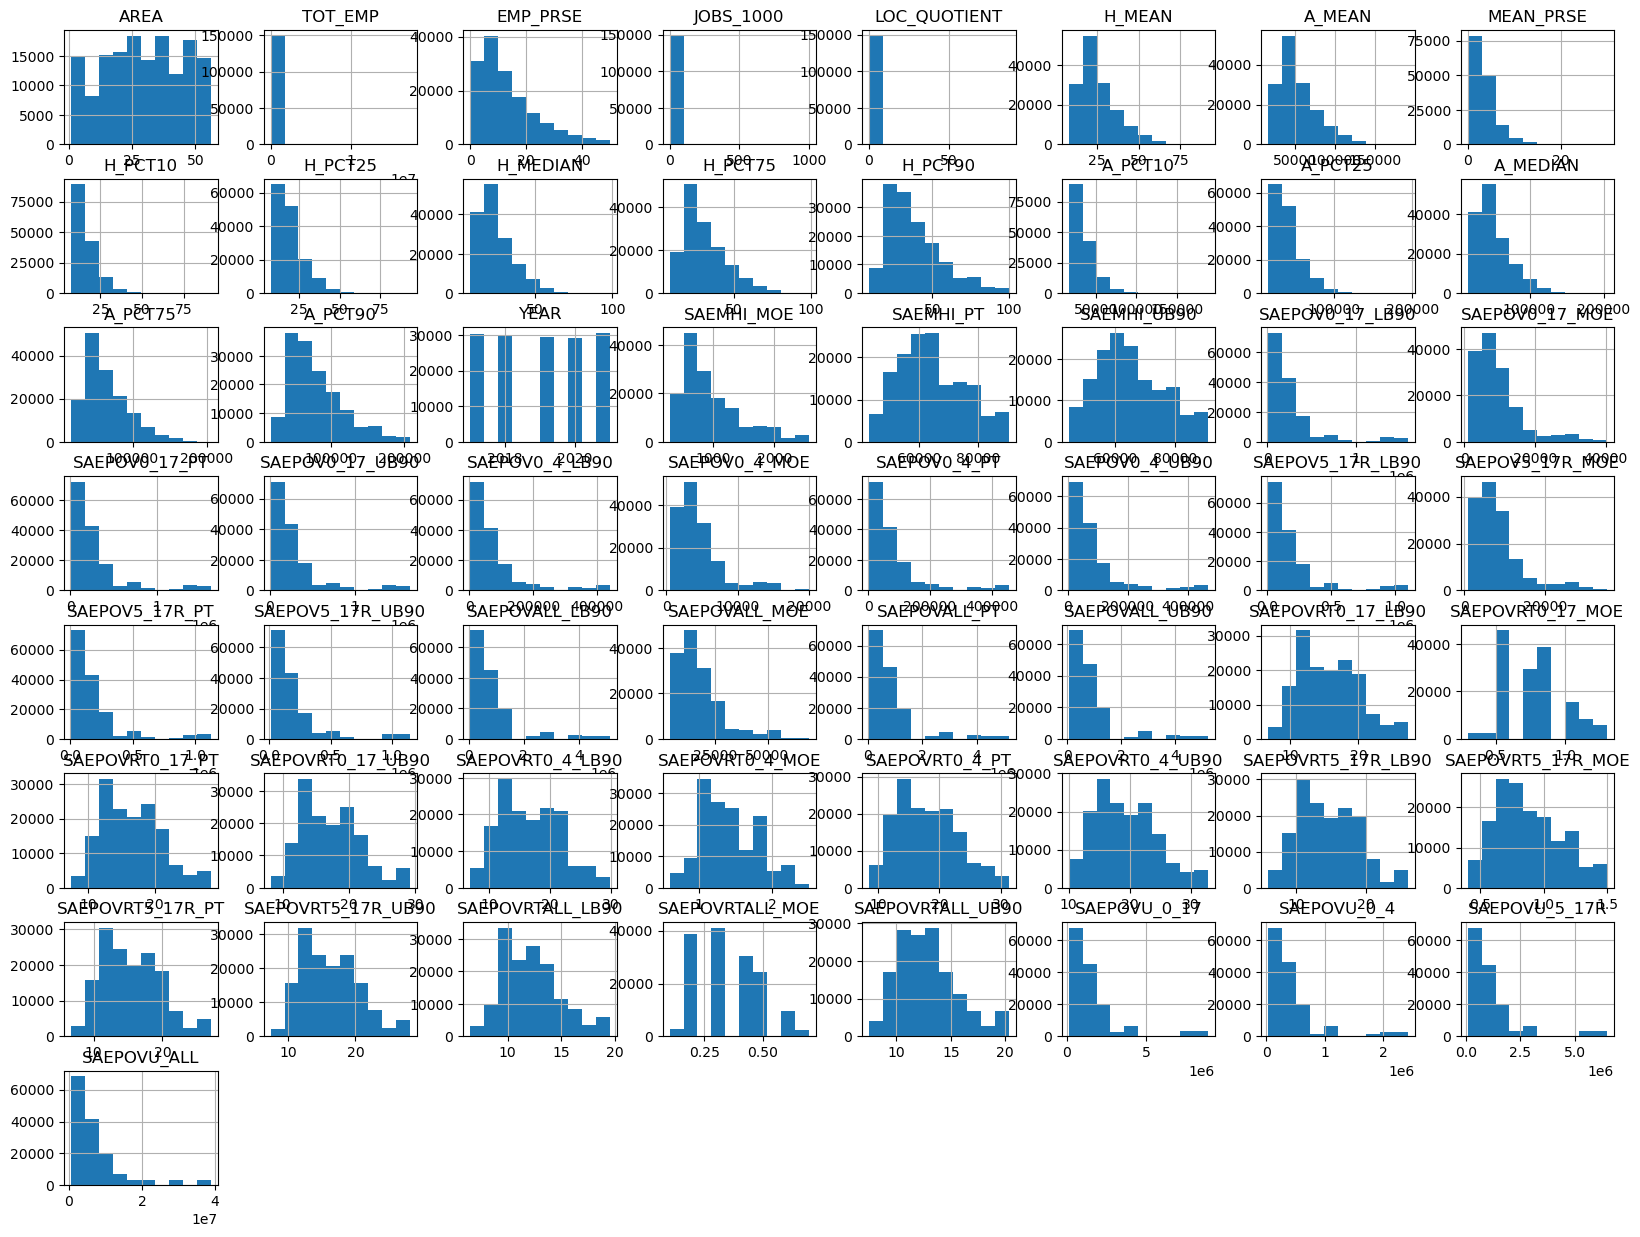

In [6]:
df_train.select_dtypes(include=np.number).hist(figsize=(20,15));

In [8]:
df_train.shape, y.shape

((149481, 61), (149481,))

In [11]:
df_train.dtypes

AREA                    int64
STATE                  object
OCC_CODE               object
OCC_TITLE              object
OCC_GROUP              object
TOT_EMP                 int64
EMP_PRSE              float64
JOBS_1000             float64
LOC_QUOTIENT          float64
H_MEAN                float64
A_MEAN                float64
MEAN_PRSE             float64
H_PCT10               float64
H_PCT25               float64
H_MEDIAN              float64
H_PCT75               float64
H_PCT90               float64
A_PCT10               float64
A_PCT25               float64
A_MEDIAN              float64
A_PCT75               float64
A_PCT90               float64
YEAR                    int64
SAEMHI_MOE            float64
SAEMHI_PT             float64
SAEMHI_UB90           float64
SAEPOV0_17_LB90       float64
SAEPOV0_17_MOE        float64
SAEPOV0_17_PT         float64
SAEPOV0_17_UB90       float64
SAEPOV0_4_LB90        float64
SAEPOV0_4_MOE         float64
SAEPOV0_4_PT          float64
SAEPOV0_4_

Get Dummies for Catergorial Data

In [12]:
X_dummy = pd.get_dummies(df_train, columns=['STATE'], drop_first=True)
X_dummy = pd.get_dummies(X_dummy, columns=['OCC_CODE'], drop_first=True)
X_dummy = pd.get_dummies(X_dummy, columns=['OCC_TITLE'], drop_first=True)
X_dummy = pd.get_dummies(X_dummy, columns=['OCC_GROUP'], drop_first=True)


Set Parameters for algorithm  
- n_estimators : The number of boosting stages: default == 100
- max_depth : limits the number of nodes in the tree
- min_sample_split : the minimum number of samples required to split an internal node
- learning_rate : how much the contribution of each tree will shrink
- loss : loss function to optimize.

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html


In [13]:
params = {
    "n_estimators": 400,
    "max_depth": 4,
    "min_samples_split": 10,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

Check for nulls

In [14]:
X_dummy.isna().sum()


AREA                                                                                                                                                  0
TOT_EMP                                                                                                                                               0
EMP_PRSE                                                                                                                                              0
JOBS_1000                                                                                                                                             0
LOC_QUOTIENT                                                                                                                                          0
H_MEAN                                                                                                                                                0
A_MEAN                                                                                  

In [15]:
X_dummy.dropna();

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.3, random_state=8)

In [20]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse_xgboost = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_xgboost))

The mean squared error (MSE) on test set: 0.0027


In [ ]:
reg.train_score_

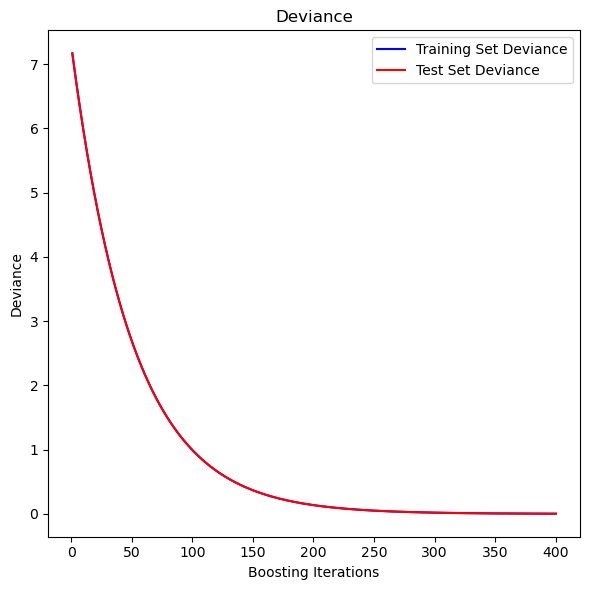

In [21]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

Plot Feature Importance
- Sorted the features and took the top 10

In [22]:
feature_names = (X_test.columns)
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[~10:]
sorted_idx = sorted_idx[:~1]
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
sorted_idx = sorted_idx[~10:]
sorted_idx = sorted_idx[:~1]
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T ,
    vert=False,
    labels=np.array(feature_names)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### Linear Regression


In [ ]:
y_linear = df['SAEPOVRTALL_PT']
X_linear = df[['AREA', 'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN',
       'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
       'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'YEAR',
       'SAEMHI_MOE', 'SAEMHI_PT', 'SAEMHI_UB90', 'SAEPOV0_17_LB90',
       'SAEPOV0_17_MOE', 'SAEPOV0_17_PT', 'SAEPOV0_17_UB90', 'SAEPOV0_4_LB90',
       'SAEPOV0_4_MOE', 'SAEPOV0_4_PT', 'SAEPOV0_4_UB90', 'SAEPOV5_17R_LB90',
       'SAEPOV5_17R_MOE', 'SAEPOV5_17R_PT', 'SAEPOV5_17R_UB90',
       'SAEPOVALL_LB90', 'SAEPOVALL_MOE', 'SAEPOVALL_PT', 'SAEPOVALL_UB90',
       'SAEPOVRT0_17_LB90', 'SAEPOVRT0_17_MOE', 'SAEPOVRT0_17_PT',
       'SAEPOVRT0_17_UB90', 'SAEPOVRT0_4_LB90', 'SAEPOVRT0_4_MOE',
       'SAEPOVRT0_4_PT', 'SAEPOVRT0_4_UB90', 'SAEPOVRT5_17R_LB90',
       'SAEPOVRT5_17R_MOE', 'SAEPOVRT5_17R_PT', 'SAEPOVRT5_17R_UB90',
       'SAEPOVRTALL_LB90', 'SAEPOVRTALL_MOE', 
       'SAEPOVRTALL_UB90', 'SAEPOVU_0_17', 'SAEPOVU_0_4', 'SAEPOVU_5_17R',
       'SAEPOVU_ALL']]


X_linear.head()

C:\Users\kendr\AppData\Local\Temp\ipykernel_34176\2971462626.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_linear['Cylinders'] = pd.to_numeric(X_linear['Cylinders'])


,Cylinders,Horsepower
0,4,140
1,6,200
2,6,172
3,6,172
4,4,208


In [ ]:
X_linear.dropna();

Simple Scatterplot Price by Horsepower, grouped by Cylinders

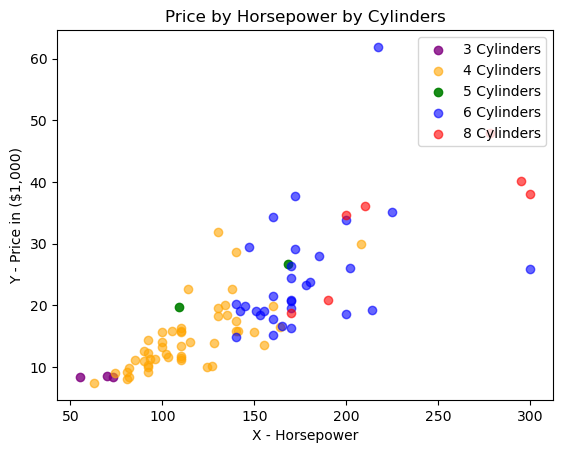

In [22]:
# palette =['purple', 'orange', 'green', 'blue', 'red']
# ind1 = X_linear['Cylinders'] == 3
# ind2 = X_linear['Cylinders'] == 4
# ind3 = X_linear['Cylinders'] == 5
# ind4 = X_linear['Cylinders'] == 6
# ind5 = X_linear['Cylinders'] == 8
# plt.scatter(X_linear['Horsepower'][ind1], y[ind1], color=palette[0], label='3 Cylinders', alpha=0.8)
# plt.scatter(X_linear['Horsepower'][ind2], y[ind2], color=palette[1], label='4 Cylinders', alpha=0.6)
# plt.scatter(X_linear['Horsepower'][ind3], y[ind3], color=palette[2], label='5 Cylinders', alpha=0.9)
# plt.scatter(X_linear['Horsepower'][ind4], y[ind4], color=palette[3], label='6 Cylinders', alpha=0.6)
# plt.scatter(X_linear['Horsepower'][ind5], y[ind5], color=palette[4], label='8 Cylinders', alpha=0.6)
# plt.xlabel("X - Horsepower")
# plt.ylabel("Y - Price in ($1,000)")
# plt.title("Price by Horsepower by Cylinders")
# plt.legend(loc='upper right')

In [23]:
X_linear.columns

Index(['Cylinders', 'Horsepower'], dtype='object')

### Train_Test_Split

In [ ]:
results = train_test_split(X_linear, y, random_state=42, test_size=0.333 )
X_linear_train, X_linear_test, y_linear_train, y_linear_test = results


### Fit/Score Model

In [ ]:
model = LinearRegression()
model.fit(X_linear_train, y_linear_train)
print(model.score(X_linear_train, y_linear_train))
print(model.score(X_linear_test, y_linear_test))

0.5278576098845948
0.8123984883846849


### Model Evaluation Metrics
- R2
- Mean Absolute Error
- Mean Squared Error (MSE)  

In [ ]:
r2_linear = r2_score(y_linear_test, model.predict(X_linear_test))
mae_linear = mean_absolute_error(y_linear_test, model.predict(X_linear_test))
mse_linear = mean_squared_error(y_linear_test, model.predict(X_linear_test))
print("The R2 on test set: {:.4f}".format(r2_linear))
print("The Mean Absolute Error on test set: {:.4f}".format(mae_linear))
print("The Mean Squared Error on test set: {:.4f}".format(mse_linear))


The R2 on test set: 0.8124
The Mean Absolute Error on test set: 3.0380
The Mean Squared Error on test set: 14.3781


In [ ]:
yhat = model.predict(X_linear)

In [ ]:
results = pd.concat([pd.DataFrame(y), X_linear, pd.DataFrame(yhat)], axis=1)
results.columns = ['PR_ALL', 'AREA', 'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN',
       'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
       'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'YEAR',
       'SAEMHI_MOE', 'SAEMHI_PT', 'SAEMHI_UB90', 'SAEPOV0_17_LB90',
       'SAEPOV0_17_MOE', 'SAEPOV0_17_PT', 'SAEPOV0_17_UB90', 'SAEPOV0_4_LB90',
       'SAEPOV0_4_MOE', 'SAEPOV0_4_PT', 'SAEPOV0_4_UB90', 'SAEPOV5_17R_LB90',
       'SAEPOV5_17R_MOE', 'SAEPOV5_17R_PT', 'SAEPOV5_17R_UB90',
       'SAEPOVALL_LB90', 'SAEPOVALL_MOE', 'SAEPOVALL_PT', 'SAEPOVALL_UB90',
       'SAEPOVRT0_17_LB90', 'SAEPOVRT0_17_MOE', 'SAEPOVRT0_17_PT',
       'SAEPOVRT0_17_UB90', 'SAEPOVRT0_4_LB90', 'SAEPOVRT0_4_MOE',
       'SAEPOVRT0_4_PT', 'SAEPOVRT0_4_UB90', 'SAEPOVRT5_17R_LB90',
       'SAEPOVRT5_17R_MOE', 'SAEPOVRT5_17R_PT', 'SAEPOVRT5_17R_UB90',
       'SAEPOVRTALL_LB90', 'SAEPOVRTALL_MOE', 
       'SAEPOVRTALL_UB90', 'SAEPOVU_0_17', 'SAEPOVU_0_4', 'SAEPOVU_5_17R',
       'SAEPOVU_ALL', 'Yhat']
results.head(5)

,Price,Cylinders,Horsepower,Yhat
0,15.9,4.0,140.0,19.337838
1,33.9,6.0,200.0,28.581157
2,29.1,6.0,172.0,24.627303
3,37.7,6.0,172.0,24.627303
4,30.0,4.0,208.0,28.940055


In [ ]:
results['Residual'] = results['PR_ALL'] - results['Yhat']
results.head(5)

,Price,Cylinders,Horsepower,Yhat,Residual
0,15.9,4.0,140.0,19.337838,-3.437838
1,33.9,6.0,200.0,28.581157,5.318843
2,29.1,6.0,172.0,24.627303,4.472697
3,37.7,6.0,172.0,24.627303,13.072697
4,30.0,4.0,208.0,28.940055,1.059945


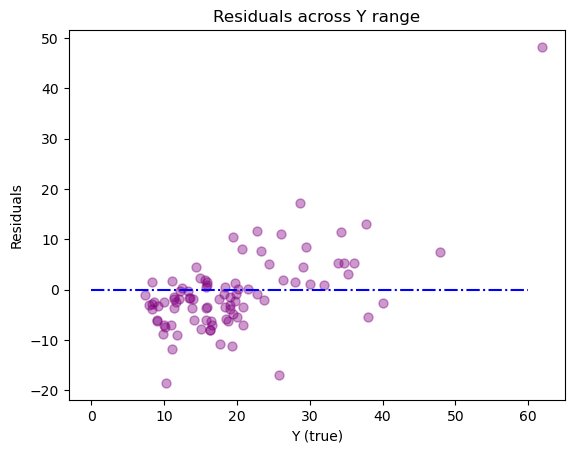

In [30]:
plt.scatter(results['PR_ALL'], results['Residual'], alpha=0.4, s= 42, c='purple');
plt.ylabel('Residuals')
plt.xlabel('Y (true)')
plt.title('Residuals across Y range')
plt.plot([0,60],[0,0], linestyle='dashdot', color='blue', markersize=2);

In [31]:
y_mean=y.mean()

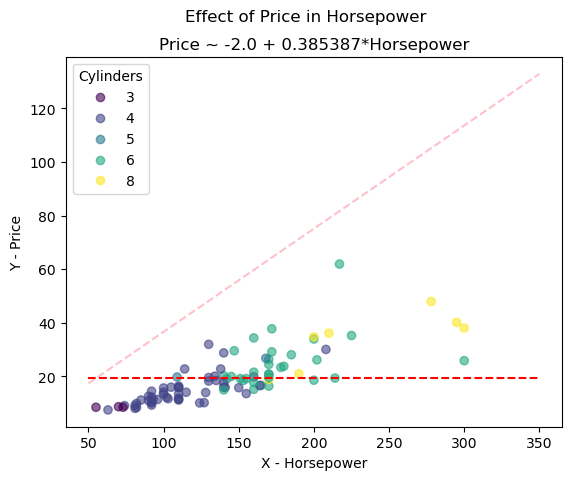

In [32]:
# scatter = plt.scatter(X_linear['Horsepower'],y, alpha=0.6, c=X_linear['Cylinders'])
# plt.xlabel("X - Horsepower")
# plt.ylabel("Y - Price")
# handles, label = scatter.legend_elements(prop="colors", alpha=0.6)

# B0 = model.intercept_
# B1 = model.coef_[0]

# x0, x1 = 50, 350
# y0, y1 = (B0 + B1*x0), (B0 + B1*x1)
# plt.plot([x0, x1], [y0, y1], linestyle='--', color='pink');
# plt.plot([x0, x1], [y_mean, y_mean], linestyle='--', color='red');
# plt.title(f"Price ~ {np.round(B0,1)} + {np.round(B1,6)}*Horsepower")
# plt.suptitle("Effect of Price in Horsepower");
# plt.legend(handles, label, loc='upper left', title="Cylinders")
# plt.show()

### Ridge Regression

class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

Linear least squares with l2 regularization.

Minimizes the objective function:

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [33]:
from sklearn.linear_model import Ridge

In [34]:
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_test, y_test)

0.9999953527735419

### Using the Permutation feature importance
- R2
- neg_mean_absolute_percentage_error
- neg_mean_squared_error

In [35]:
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(
    model, X_test, y_test, n_repeats=30, random_state=0, scoring=scoring)

for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"    {feature_names[i]:<8}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

r2
    Max.Price0.265 +/- 0.049
    Price   0.240 +/- 0.038
    Min.Price0.202 +/- 0.027
    Wheelbase0.000 +/- 0.000
    Weight  0.000 +/- 0.000
    EngineSize0.000 +/- 0.000
    Width   0.000 +/- 0.000
    RPM     0.000 +/- 0.000
    Manufacturer_Pontiac0.000 +/- 0.000
    Manufacturer_Eagle0.000 +/- 0.000
neg_mean_absolute_percentage_error
    Max.Price0.222 +/- 0.032
    Price   0.206 +/- 0.027
    Min.Price0.186 +/- 0.022
    Wheelbase0.000 +/- 0.000
    Weight  0.000 +/- 0.000
    EngineSize0.000 +/- 0.000
    Width   0.000 +/- 0.000
    RPM     0.000 +/- 0.000
    Man.trans.avail0.000 +/- 0.000
    Manufacturer_Honda0.000 +/- 0.000
    Manufacturer_Pontiac0.000 +/- 0.000
neg_mean_squared_error
    Max.Price24.379 +/- 4.552
    Price   22.072 +/- 3.496
    Min.Price18.647 +/- 2.529
    Wheelbase0.000 +/- 0.000
    Weight  0.000 +/- 0.000
    EngineSize0.000 +/- 0.000
    Width   0.000 +/- 0.000
    RPM     0.000 +/- 0.000
    Manufacturer_Pontiac0.000 +/- 0.000
    Manufacturer_E

In [36]:
print(f'The MSE using XGBoost was : {mse_xgboost}')
print(f'The MSE using Linear Regression was: {mse_linear}')

The MSE using XGBoost was : 0.5987210034542185
The MSE using Linear Regression was: 14.378103906919177
